#Problem 5

In [ ]:
#download the model
!git clone https://github.com/xavysp/DexiNed.git
%cd DexiNed

Cloning into 'DexiNed'...
remote: Enumerating objects: 1051, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1051 (delta 87), reused 101 (delta 45), pack-reused 904
Receiving objects: 100% (1051/1051), 158.92 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (517/517), done.
/content/DexiNed


In [ ]:
#check for graphics card
!nvidia-smi

Sat Dec 11 06:04:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install kornia

     |████████████████████████████████| 401 kB 5.4 MB/s 


In [ ]:
#downloading the pretrained weights
!gdown --id 1V56vGTsu7GYiQouCIKvTWl5UKCZ6yCNu

Downloading...
From: https://drive.google.com/uc?id=1V56vGTsu7GYiQouCIKvTWl5UKCZ6yCNu
To: /content/DexiNed/10_model.pth
100% 141M/141M [00:00<00:00, 169MB/s]


In [ ]:
%mkdir -p checkpoints/BIPED/10
%mv 10_model.pth checkpoints/BIPED/10/

##SVHN

In [ ]:
#download the SVHN dataset
%cd /content/
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

/content
--2021-12-11 06:04:23--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  21.1MB/s    in 9.1s    

2021-12-11 06:04:33 (19.2 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2021-12-11 06:04:33--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  19.2MB/s    in 3.5s    

2021-12-11 06:04:37 (17.3 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [ ]:
%mkdir -p SVHN-images/test/01
%mkdir -p SVHN-images/train/01

In [ ]:
import os
import numpy as np
import struct
import scipy.io as sio
import matplotlib.pyplot as plt

def save_svhn():
    dir_name = "SVHN-images"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    print ("Loading data of SVHN")
    mat = sio.loadmat("test_32x32.mat")
    data = mat['X']
    for i in range(data.shape[3]):
        plt.figure()
        if not os.path.isfile(os.path.join(dir_name, 'train','01', "%05d.png" % i)):
            plt.imsave(os.path.join(dir_name, 'train','01', "%05d.png" % i), data[..., i])
        if not os.path.isfile(os.path.join(dir_name, 'test', '01', "%05d.png" % i)):
            plt.imsave(os.path.join(dir_name, 'test','01', "%05d.png" % i), data[..., i])
        plt.close()
        # break
    print ("Program done!")

save_svhn()

Loading data of SVHN
Program done!


In [ ]:
%rm -rf SVHN-edges/

In [ ]:
%rm -rf DexiNed/data/*

In [ ]:
%rm -rf /content/DexiNed/result/

Running edge detection on test dataset and storing the results

In [ ]:
%%shell
cd /content/DexiNed/
# data_dir = "/content/SVHN-images"
for dir in /content/SVHN-images/test/*/    # list directories in the form "/tmp/dirname/"
do
    dir=${dir%*/}      # remove the trailing "/"
    mkdir -p "/content/SVHN-edges/test/${dir##*/}"

    rm -rf /content/DexiNed/data/*
    rm -rf /content/DexiNed/result/

    cp -v `ls -d /content/SVHN-images/test/${dir##*/}/* | head -1000` /content/DexiNed/data

    python /content/DexiNed/main.py --choose_test_data=-1

    mv -v /content/DexiNed/result/BIPED2CLASSIC/fused/* /content/SVHN-edges/test/${dir##*/}/
    
    echo "${dir##*/}"    # print everything after the final "/"
done

cd /content/

'/content/SVHN-images/test/01/00000.png' -> '/content/DexiNed/data/00000.png'
'/content/SVHN-images/test/01/00001.png' -> '/content/DexiNed/data/00001.png'
'/content/SVHN-images/test/01/00002.png' -> '/content/DexiNed/data/00002.png'
'/content/SVHN-images/test/01/00003.png' -> '/content/DexiNed/data/00003.png'
'/content/SVHN-images/test/01/00004.png' -> '/content/DexiNed/data/00004.png'
'/content/SVHN-images/test/01/00005.png' -> '/content/DexiNed/data/00005.png'
'/content/SVHN-images/test/01/00006.png' -> '/content/DexiNed/data/00006.png'
'/content/SVHN-images/test/01/00007.png' -> '/content/DexiNed/data/00007.png'
'/content/SVHN-images/test/01/00008.png' -> '/content/DexiNed/data/00008.png'
'/content/SVHN-images/test/01/00009.png' -> '/content/DexiNed/data/00009.png'
'/content/SVHN-images/test/01/00010.png' -> '/content/DexiNed/data/00010.png'
'/content/SVHN-images/test/01/00011.png' -> '/content/DexiNed/data/00011.png'
'/content/SVHN-images/test/01/00012.png' -> '/content/DexiNed/da

running edge detection on train dataset and storing results

In [ ]:
%%shell
cd /content/DexiNed/
# data_dir = "/content/SVHN-images"
for dir in /content/SVHN-images/train/*/    # list directories in the form "/tmp/dirname/"
do
    dir=${dir%*/}      # remove the trailing "/"
    mkdir -p "/content/SVHN-edges/train/${dir##*/}"

    rm -rf /content/DexiNed/data/*
    rm -rf /content/DexiNed/result/

    cp -v `ls -d /content/SVHN-images/train/${dir##*/}/* | head -1000` /content/DexiNed/data

    python /content/DexiNed/main.py --choose_test_data=-1

    mv -v /content/DexiNed/result/BIPED2CLASSIC/fused/* /content/SVHN-edges/train/${dir##*/}/
    
    echo "${dir##*/}"    # print everything after the final "/"
done

cd /content/

'/content/SVHN-images/train/01/00000.png' -> '/content/DexiNed/data/00000.png'
'/content/SVHN-images/train/01/00001.png' -> '/content/DexiNed/data/00001.png'
'/content/SVHN-images/train/01/00002.png' -> '/content/DexiNed/data/00002.png'
'/content/SVHN-images/train/01/00003.png' -> '/content/DexiNed/data/00003.png'
'/content/SVHN-images/train/01/00004.png' -> '/content/DexiNed/data/00004.png'
'/content/SVHN-images/train/01/00005.png' -> '/content/DexiNed/data/00005.png'
'/content/SVHN-images/train/01/00006.png' -> '/content/DexiNed/data/00006.png'
'/content/SVHN-images/train/01/00007.png' -> '/content/DexiNed/data/00007.png'
'/content/SVHN-images/train/01/00008.png' -> '/content/DexiNed/data/00008.png'
'/content/SVHN-images/train/01/00009.png' -> '/content/DexiNed/data/00009.png'
'/content/SVHN-images/train/01/00010.png' -> '/content/DexiNed/data/00010.png'
'/content/SVHN-images/train/01/00011.png' -> '/content/DexiNed/data/00011.png'
'/content/SVHN-images/train/01/00012.png' -> '/conte

# Edges and Edge-enhanced Images 





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from natsort import natsorted as nsort
%matplotlib inline

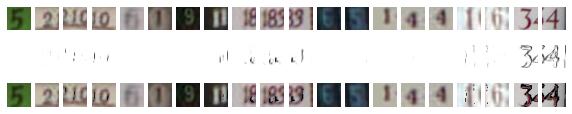

In [ ]:
#combined example
images_path = nsort([image for image in os.listdir(os.path.join('SVHN-edges','train','01')) if image.startswith('0')])
input_path = nsort([image for image in os.listdir(os.path.join('SVHN-images','train','01')) if image.startswith('0')])


fig = plt.figure(figsize=(10,2))

# setting values to rows and column variables
rows = 3
columns = 20

for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(os.path.join(os.path.join('SVHN-images','train','01',input_path[i])))
  plt.imshow(image)
  plt.axis('off')
  
#edges
for i in range(columns, 2*columns):
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(os.path.join(os.path.join('SVHN-edges','train','01',images_path[i-columns])))
  plt.imshow(image)
  plt.axis('off')

# edge enhanced images
for i in range(2*columns, 3*columns):
  fig.add_subplot(rows, columns, i+1)
  original = cv2.imread(os.path.join(os.path.join('SVHN-images','train','01',input_path[i-2*columns])))
  edges = cv2.imread(os.path.join(os.path.join('SVHN-edges','train','01',images_path[i-2*columns])))
  img2 = original.copy()
  img2[edges[:,:,0] <= 200] = [0, 0, 0]  
  plt.imshow(img2)
  plt.axis('off')



##Individual Exapmles

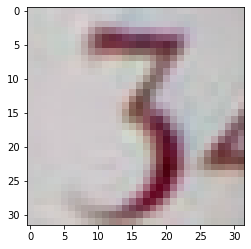

In [ ]:
#Original image
img = cv2.imread(os.path.join(os.path.join('SVHN-images','train','01',input_path[18])))  # creat RGB image from grayscale
plt.imshow(img)


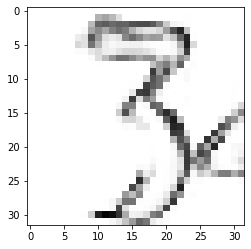

In [ ]:
#detected edge
edges = cv2.imread(os.path.join(os.path.join('SVHN-edges','train','01',images_path[18])))
plt.imshow(edges)

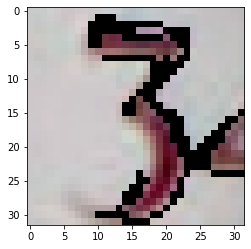

In [ ]:
#Edge-enhanced image
img2 = img.copy()
img2[edges[:,:,0] <= 200] = [0, 0, 0]  
plt.imshow(img2)

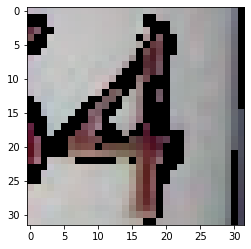

In [ ]:
#another example
img = cv2.imread(os.path.join(os.path.join('SVHN-images','train','01',input_path[19])))
edges = cv2.imread(os.path.join(os.path.join('SVHN-edges','train','01',images_path[19])))
img2 = img.copy()
img2[edges[:,:,0] <= 200] = [0, 0, 0]  
plt.imshow(img2)

##Saving edge enhanced images for further problems

In [ ]:
%mkdir -p /content/SVHN-enhanced/train/

data_dir1 = '/content/SVHN-images/'
data_dir2 = '/content/SVHN-edges/'

#print(os.listdir(data_dir))
classes = os.listdir(data_dir1 + "/train")
print(classes)

['01']


In [ ]:
for x in classes:
  path = os.path.join('SVHN-enhanced', 'train', x)
  os.mkdir(path)

  images_path = nsort([image for image in os.listdir(os.path.join('SVHN-edges','train',x))])
  input_path = nsort([image for image in os.listdir(os.path.join('SVHN-images','train',x))])

  
  for i in range(len(images_path)):
    original = cv2.imread(os.path.join(os.path.join('SVHN-images', 'train', x, input_path[i])))
   
    edges = cv2.imread(os.path.join(os.path.join('SVHN-edges', 'train', x, images_path[i])))
    img2 = original.copy()
    img2[edges[:,:,0] <= 200] = [0, 0, 0]  
    cv2.imwrite(os.path.join(path, images_path[i]), img2)
  

In [ ]:
%mkdir -p /content/SVHN-enhanced/test/

data_dir1 = '/content/SVHN-images/'
data_dir2 = '/content/SVHN-edges/'

#print(os.listdir(data_dir))
classes = os.listdir(data_dir1 + "/test")
print(classes)

['01']


In [ ]:
for x in classes:
  path = os.path.join('SVHN-enhanced', 'test', x)
  os.mkdir(path)

  images_path = nsort([image for image in os.listdir(os.path.join('SVHN-edges','test',x))])
  input_path = nsort([image for image in os.listdir(os.path.join('SVHN-images','test',x))])

  
  for i in range(len(images_path)):
    original = cv2.imread(os.path.join(os.path.join('SVHN-images', 'test', x, input_path[i])))
  
    edges = cv2.imread(os.path.join(os.path.join('SVHN-edges', 'test', x, images_path[i])))
    img2 = original.copy()
    img2[edges[:,:,0] <= 200] = [0, 0, 0]  
    cv2.imwrite(os.path.join(path, images_path[i]), img2)
  

#Problem 6

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Look into the data directory
data_dir = '/content/SVHN-edges'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

batch_size = 400

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([100, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.0, 'val_loss': 2.5569000244140625}]

In [ ]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 0.1314, val_loss: 0.7736, val_acc: 0.7663
Epoch [1], last_lr: 0.00147, train_loss: 0.1244, val_loss: 0.8020, val_acc: 0.7663
Epoch [2], last_lr: 0.00274, train_loss: 0.1482, val_loss: 0.9684, val_acc: 0.7387
Epoch [3], last_lr: 0.00430, train_loss: 0.2340, val_loss: 2.6384, val_acc: 0.5394
Epoch [4], last_lr: 0.00598, train_loss: 0.4934, val_loss: 1.8701, val_acc: 0.5569
Epoch [5], last_lr: 0.00757, train_loss: 0.6579, val_loss: 1.3654, val_acc: 0.6350
Epoch [6], last_lr: 0.00886, train_loss: 0.6669, val_loss: 2.7925, val_acc: 0.5294
Epoch [7], last_lr: 0.00971, train_loss: 0.6654, val_loss: 2.1612, val_acc: 0.5087
Epoch [8], last_lr: 0.01000, train_loss: 0.7168, val_loss: 3.1856, val_acc: 0.3888
Epoch [9], last_lr: 0.00994, train_loss: 0.6962, val_loss: 3.9033, val_acc: 0.4081
Epoch [10], last_lr: 0.00978, train_loss: 0.7557, val_loss: 1.4562, val_acc: 0.6125
Epoch [11], last_lr: 0.00950, train_loss: 0.5648, val_loss: 1.1589, val_acc: 0.6931
Ep

#Problem 7


In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Look into the data directory
data_dir = '/content/SVHN-enhanced'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

batch_size = 400

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.0625, 'val_loss': 2.329768180847168}]

In [ ]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 1.0868, val_loss: 1.0563, val_acc: 0.6225
Epoch [1], last_lr: 0.00147, train_loss: 1.0371, val_loss: 1.2217, val_acc: 0.5638
Epoch [2], last_lr: 0.00274, train_loss: 1.0088, val_loss: 1.2669, val_acc: 0.5881
Epoch [3], last_lr: 0.00430, train_loss: 1.0364, val_loss: 1.6740, val_acc: 0.5256
Epoch [4], last_lr: 0.00598, train_loss: 1.1114, val_loss: 2.3463, val_acc: 0.3925
Epoch [5], last_lr: 0.00757, train_loss: 1.2472, val_loss: 1.8541, val_acc: 0.5137
Epoch [6], last_lr: 0.00886, train_loss: 1.3280, val_loss: 2.5516, val_acc: 0.4556
Epoch [7], last_lr: 0.00971, train_loss: 1.3048, val_loss: 1.6481, val_acc: 0.4350
Epoch [8], last_lr: 0.01000, train_loss: 1.1036, val_loss: 1.3297, val_acc: 0.5531
Epoch [9], last_lr: 0.00994, train_loss: 1.1446, val_loss: 1.9190, val_acc: 0.4762
Epoch [10], last_lr: 0.00978, train_loss: 1.2708, val_loss: 1.0269, val_acc: 0.6569
Epoch [11], last_lr: 0.00950, train_loss: 1.0058, val_loss: 0.9897, val_acc: 0.6594
Ep